In [2]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

import category_encoders as ce
from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC

In [19]:
df = pd.read_csv('clean_data.csv')

In [20]:
pd.options.display.max_columns=100 # to see all columns

In [21]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )

In [193]:
df1 = df.copy()

In [194]:
df1.drop(columns=['lga','ward'],inplace=True ) 

In [195]:
df1['permit'] = df1['permit'].astype(bool).astype(int)

In [196]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int)

In [197]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [198]:
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [55]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [56]:
df[target].unique()

array([0, 2, 1])

In [12]:
# target_status_group = {0:1, 1: 1, 2 : 0}
# df1['status_group'] = df1['status_group'].replace(target_status_group)

In [199]:
target='status_group'

In [200]:
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
scaler=RobustScaler()
encoder = ce.TargetEncoder(cols=cat_col)

# putting numeric columns to scaler and categorical to encoder
num_transformer = make_pipeline(scaler)
cat_transformer = make_pipeline(encoder)

# getting together our scaler and encoder with preprocessor
preprocessor = ColumnTransformer(
      transformers=[('num', num_transformer, num_col),
                    ('cat', cat_transformer, cat_col)])

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,
                            criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')
# lr = LogisticRegression(class_weight='balanced', random_state=42, C=100.0)
# # giving all values to pipeline


 

pipe = make_pipeline(preprocessor,rf)

# # scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
# # print(scores.mean(), "+/-", scores.std()) 
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_train)

# make predictions on test set
y_score = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_score)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score)}")


Accuracy:
TRAIN: 0.9201599326599327
TEST: 0.7961279461279461

Balanced Accuracy:
TRAIN: 0.932632310756815
TEST: 0.7123422369073463


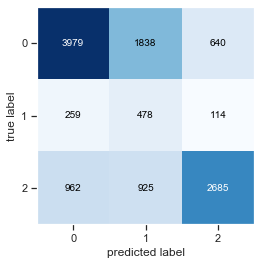

In [61]:
cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm)
plt.show()

In [63]:
import xgboost as xgb
from xgboost import XGBClassifier

Accuracy:
TRAIN: 0.9133627946127946
TEST: 0.8122053872053872

Balanced Accuracy:
TRAIN: 0.8180722039514005
TEST: 0.6561393682677205


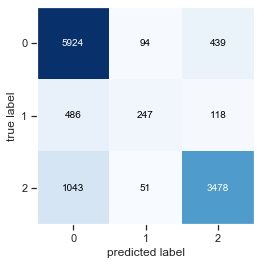

In [64]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 12, colsample_bytree = .4, learning_rate = 0.1)

pipe = make_pipeline(preprocessor,xgb)
pipe.fit(X_train, y_train)


# make predictions on training set
y_pred = pipe.predict(X_train)

# make predictions on test set
y_score = pipe.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_score)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score)}")


cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm)
plt.show()

In [68]:
from imblearn.over_sampling import SMOTE

In [120]:
from sklearn import preprocessing

In [201]:
df4=df1.copy()

In [202]:
encoder = TargetEncoder()

for c in cat_col:
    df4[str(c) + '_encoded'] = encoder.fit_transform(df4[c].values, df4[target])
    df4.drop(columns=c, inplace=True) 

In [203]:
scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df3[col])),columns=[col])
    return df

scaled_df = scaleColumns(df3,[num_col])

# def scaleColumns(df, cols_to_scale):
#     for col in cols_to_scale:
#         df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[col])),columns=[col])
#     return df

In [204]:
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
smote_train = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_train_resampled, y_train_resampled = smote_train.fit_sample(X_train, y_train)
print(y_train.value_counts())
np = y_train_resampled
new_series = pd.Series(np)

print(new_series.value_counts())

0.0    25802
1.0    18252
0.5     3466
Name: status_group, dtype: int64
1.0    25802
0.5    25802
0.0    25802
dtype: int64


In [180]:
clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1)
# scores = cross_val_score(clf_xg, X_train_resampled, new_series, cv=5, scoring='accuracy')
# print(scores.mean(), '+/-', scores.std())

In [146]:
clf_xg.fit(X_train_resampled, new_series)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.4, eta=0.1, eval_metric='merror', gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=16, maximize=False,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nrounds='min.error.idx', nthread=None, num_class=3,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1)

Accuracy Score:  0.9736842105263158


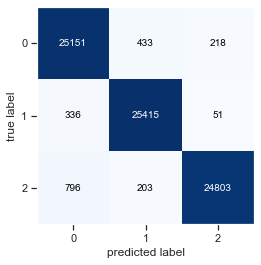

In [93]:
preds_train_resampled = clf_xg.predict(X_train_resampled)
# preds_test_resampled = clf_xg.predict(X_test_resampled)
# preds_train = clf_xg.predict(X_train)
# preds_test = clf_xg.predict(X_test)
y_score = pipe.predict(X_test)
print("Accuracy Score train: ", accuracy_score(new_series, preds_train_resampled))
cm = confusion_matrix(new_series, preds_train_resampled)
plot_confusion_matrix(cm)
plt.show()


In [94]:
print("Balanced Accuracy Score: ", balanced_accuracy_score(new_series, preds_train_resampled))


Balanced Accuracy Score:  0.9736842105263158


In [182]:
smote = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_resampled, y_resampled = smote.fit_sample(X, y)
print(y.value_counts())

y_resample = pd.Series(y_resampled)

print(y_resample.value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64
2    32259
1    32259
0    32259
dtype: int64


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resample, test_size=0.2, random_state=42)

In [ ]:
XGBClassifier()

In [192]:
clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
                      early_stopping_rounds=10)

# clf_xg = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
#                       num_class = 3, maximize = False, eval_metric = 'merror', eta = .2,
#                       max_depth = 14, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1,
#                       early_stopping_rounds=10)
clf_xg.fit(X_train, y_train)


# make predictions on training set
y_pred = clf_xg.predict(X_train)

# make predictions on test set
y_score = clf_xg.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_score)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_score)}")


Accuracy:
TRAIN: 0.9520931013549295
TEST: 0.8599400702624509

Balanced Accuracy:
TRAIN: 0.9521035519751783
TEST: 0.8599018223915921


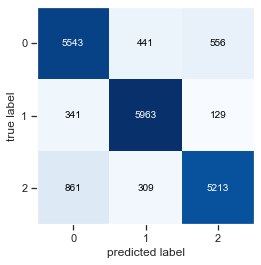

In [186]:
cm = confusion_matrix(y_test, y_score)
plot_confusion_matrix(cm)
plt.show()


In [104]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [114]:
from sklearn.neighbors import KNeighborsClassifier